In [1]:
import pandas as pd

In [2]:
import os
os.listdir()

['Pre-workshop questionnaire – Prefilled form.docx',
 'ES_importance_violin.png',
 'Pre-workshop questionnaire summary.pptx',
 'Pre-workshop questionnaire(1-12).xlsx',
 '.ipynb_checkpoints',
 'hazard_and_es_importance_violin.ipynb',
 'pre_workshop_quesitonnaire_for_analysis',
 'hazard_importance_violin.png']

In [3]:
df = pd.read_excel(
"Pre-workshop questionnaire(1-12).xlsx"
    #    "questionnaire_for_analysis.xlsx"
)
df.columns = df.columns.str.strip()

df['Wildfire'] = df['Wildfire'].replace('5 (most important)', 5).astype(int)
df['Drought'] = df['Drought'].replace('5 (most important)', 5).astype(int)
df['Insect outbreak'] = df['Insect outbreak'].replace('5 (most important)', 5).astype(int)

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_2080/1887425711.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Wildfire'] = df['Wildfire'].replace('5 (most important)', 5).astype(int)


In [4]:
print(df.columns)

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Full name', 'Email address',
       'Please select state(s) where you engage in planning, resource management, research, or other work?',
       'Which geographic areas within these states do you focus on?',
       'What do you want to gain from the workshop?', 'Water supply',
       'Timber production', 'Soil erosion control', 'Carbon storage',
       'Biodiversity', 'Recreation', 'Water supply2', 'Timber production 2',
       'Soil erosion control 2', 'Carbon storage2', 'Biodiversity2',
       'Recreation2',
       'Are there other important forest ecosystem services in your study area(s)? If so, which ones? (also rank the importance from 1 to 5 and your expertise)',
       'What indicator(s) and dataset(s) would you use to quantify water supply in your area(s)? (Example: Indicator 1: Annual precipitation, Dataset 1: PRISM daily precipitation)',
       'What indicator(s) and dataset(s) would 

In [5]:

df_long = df.melt(
  #  id_vars="Name",
    value_vars=["Drought", "Insect outbreak", "Wildfire"],
    var_name="Hazard",
    value_name="Importance"
)
df_long

,Hazard,Importance
0,Drought,4
1,Drought,4
2,Drought,3
3,Drought,3
4,Drought,3
5,Drought,4
6,Insect outbreak,4
7,Insect outbreak,4
8,Insect outbreak,4
9,Insect outbreak,4


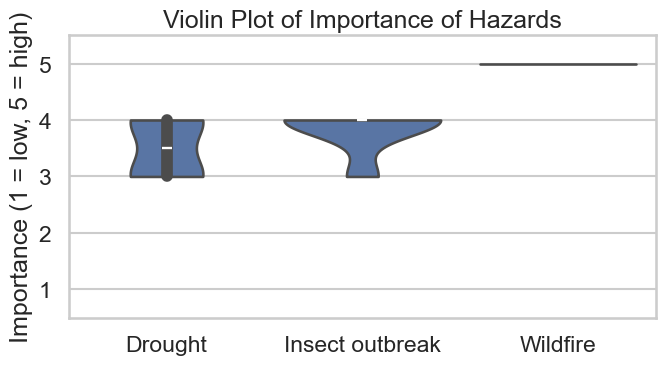

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

sns.set_theme(
    style="whitegrid",
    context="talk",
   # font_scale= 1.2   # increase this to make everything bigger
)

sns.violinplot(
    data=df_long,
    x="Hazard",
    y="Importance",
    inner="box",      # shows median + IQR
    cut=0             # keeps values within 1–5
)

plt.ylim(0.5, 5.5)
plt.ylabel("Importance (1 = low, 5 = high)")
plt.xlabel("")
plt.title("Violin Plot of Importance of Hazards")
plt.tight_layout()


plt.savefig("hazard_importance_violin.png")
plt.show()

In [7]:
#  Water supply	Timber production 	Soil erosion control 	Carbon storage	Biodiversity	Recreation
#df.columns = df.columns.str.strip()

df['Water supply'] = df['Water supply'].replace('5 (most important)', 5).astype(int)
df['Timber production'] = df['Timber production'].replace('5 (most important)', 5).astype(int)
df['Soil erosion control'] = df['Soil erosion control'].replace('5 (most important)', 5).astype(int)
df['Carbon storage'] = df['Carbon storage'].replace('5 (most important)', 5).astype(int)
df['Biodiversity'] = df['Biodiversity'].replace('5 (most important)', 5).astype(int)
df['Recreation'] = df['Recreation'].replace('5 (most important)', 5).astype(int)


df_long = df.melt(
  #  id_vars="Name",
    value_vars=['Water supply', 'Timber production','Carbon storage', 'Soil erosion control' , 'Recreation' ,'Biodiversity'
               ],
    var_name="Ecosystem service",
    value_name="Importance"
)
df_long


,Ecosystem service,Importance
0,Water supply,5
1,Water supply,5
2,Water supply,4
3,Water supply,5
4,Water supply,1
5,Water supply,5
6,Timber production,5
7,Timber production,4
8,Timber production,4
9,Timber production,3


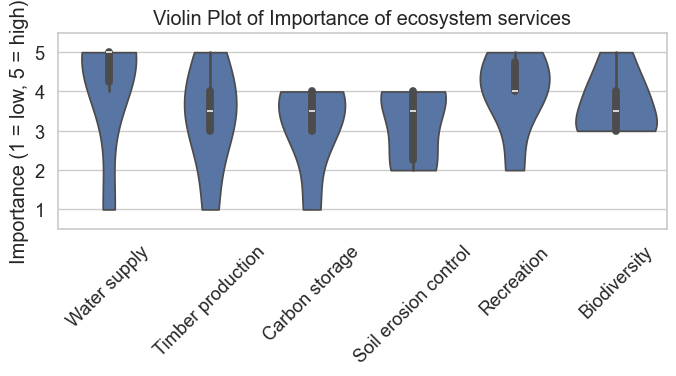

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

sns.set_theme(
    style="whitegrid",
   # context="talk",
    font_scale= 1.2   # increase this to make everything bigger
)

sns.violinplot(
    data=df_long,
    x="Ecosystem service",
    y="Importance",
    inner="box",      # shows median + IQR
    cut=0             # keeps values within 1–5
)

plt.xticks(rotation=45) 
plt.ylim(0.5, 5.5)
plt.ylabel("Importance (1 = low, 5 = high)")
plt.xlabel("")
plt.title("Violin Plot of Importance of ecosystem services")
plt.tight_layout()

plt.savefig("ES_importance_violin.png")
plt.show()

In [9]:
counts = (
    df['Please select state(s) where you engage in planning, resource management, research, or other work?']
    .dropna()
    .str.split(';')
    .explode()
    .str.strip()
    .value_counts()
)

states = ['California', 'Washington', 'Oregon']

counts = counts.loc[counts.index.isin(states)]

print(counts)
print(type(counts))

Please select state(s) where you engage in planning, resource management, research, or other work?
California    5
Washington    4
Oregon        4
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


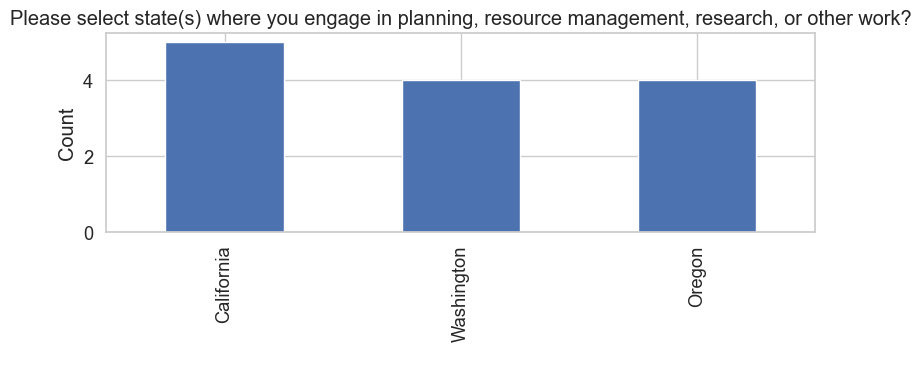

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
counts.plot(kind='bar')
plt.xlabel(' ')
plt.ylabel('Count')
plt.title('Please select state(s) where you engage in planning, resource management, research, or other work?')
plt.tight_layout()



plt.savefig("state.png")
plt.show()

